In [20]:
import scipy.io as sci
import numpy as np
import glob
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import pylab
#import statsmodels.api as sm

## Data Format
The matlab data is formatted so that flash responses and beep responses are stored in separate matrices called accMatF for flash and accMatB for beep. The flash and beep combinations corresponding to the responses are also stored in separate matrices called mixtrF for flash and mixtrB for beep. We will separate the data based on the type of response the participant gave, and from there we can subset by congruent or unisensory.

In [21]:
datapath = 'ExpData/*.mat'
datafiles = np.array(glob.glob(datapath))

In [37]:
flashdata = np.empty((1,5))
beepdata = np.empty((1,5))
for i in np.arange(0, len(datafiles)):
    mat = sci.loadmat(datafiles[i])
    matf = np.insert(mat['mixtrF'], 0, int(i + 1), axis=1)
    accf = np.hstack((matf, mat['accMatF'], mat['resptimeF']))
    matb = np.insert(mat['mixtrB'], 0, int(i + 1), axis=1)
    accb = np.hstack((matb, mat['accMatB'], mat['resptimeB']))
    flashdata = np.vstack((flashdata, accf))
    beepdata = np.vstack((beepdata, accb))
    
flashdata = flashdata[1:]
beepdata = beepdata[1:]

### We will store the data in Pandas dataframes to make subsetting and extracting columns/rows easier:
Column 1: Subject ID <br>
Column 2: Number of flashes presented <br>
Column 3: Number of beeps presented <br>
Column 4: Accuracy of response <br>
Column 5: Response time 

In [23]:
flashframe = pd.DataFrame(flashdata, columns=['Subj_id', 'flashpres', 'beeppres', 'acc', 'rt'])
beepframe = pd.DataFrame(beepdata, columns=['Subj_id', 'flashpres', 'beeppres', 'acc', 'rt'])

In [70]:
congrf = flashframe.loc[flashframe['flashpres'] == flashframe['beeppres']]
unif = flashframe.loc[flashframe['beeppres'] == 0]
congrb = beepframe.loc[beepframe['flashpres'] == beepframe['beeppres']]
unib = beepframe.loc[beepframe['flashpres'] == 0]

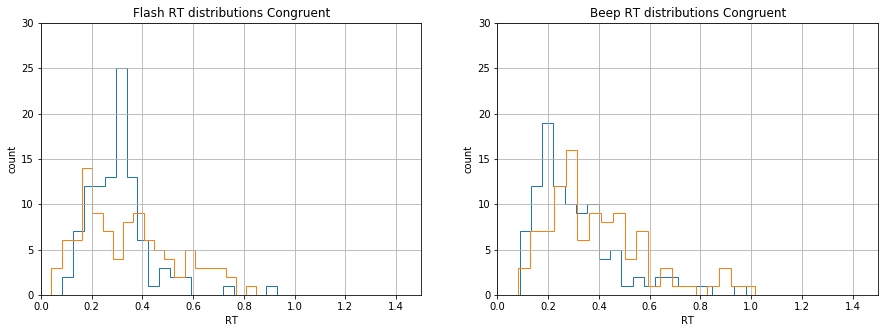

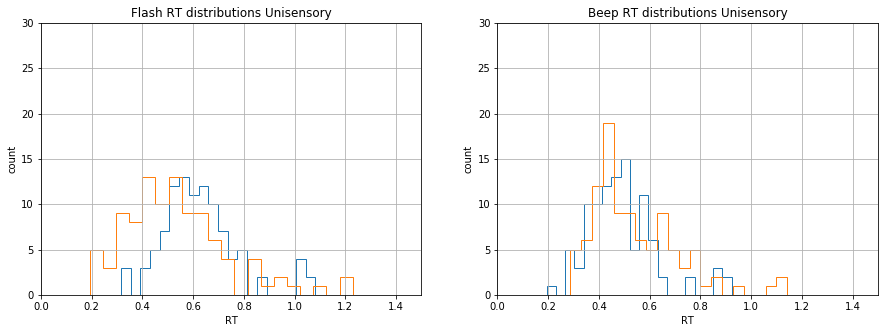

In [25]:
congrfig = plt.figure(figsize=(15, 5))
ax = congrfig.add_subplot(121, xlabel='RT', ylabel='count', title='Flash RT distributions Congruent')
ax.set_xlim([0, 1.5])
ax.set_ylim([0, 30])
for i, subj_data in congrf.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

ax = congrfig.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Congruent')
ax.set_xlim([0, 1.5])
ax.set_ylim([0, 30])
for i, subj_data in congrb.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
    
unifig = plt.figure(figsize=(15, 5))
ax = unifig.add_subplot(121, xlabel='RT', ylabel='count', title='Flash RT distributions Unisensory')
ax.set_xlim([0, 1.5])
ax.set_ylim([0, 30])
for i, subj_data in unif.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

ax = unifig.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT distributions Unisensory')
ax.set_xlim([0, 1.5])
ax.set_ylim([0, 30])
for i, subj_data in unib.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

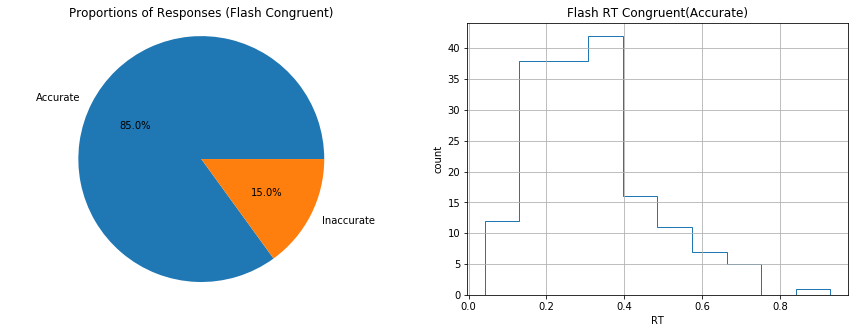

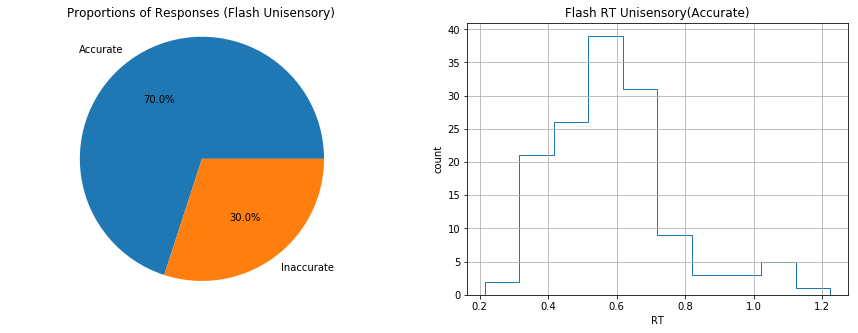

In [26]:
sizes = [congrf['acc'].value_counts()[1], congrf['acc'].value_counts()[0]]
labels = ['Accurate', 'Inaccurate']

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(121, title='Proportions of Responses (Flash Congruent)')
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig.add_subplot(122, xlabel='RT', ylabel='count', title='Flash RT Congruent(Accurate)')
#for i, subj_data in congf.groupby('response'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
congrf.loc[congrf['acc'] == 1].rt.hist(histtype='step', ax = ax)


#print(unifdata['response'].value_counts())
sizes = [unif['acc'].value_counts()[1], unif['acc'].value_counts()[0]]
labels = ['Accurate', 'Inaccurate']

fig3 = plt.figure(figsize=(15, 5))
ax = fig3.add_subplot(121, title='Proportions of Responses (Flash Unisensory)')
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig3.add_subplot(122, xlabel='RT', ylabel='count', title='Flash RT Unisensory(Accurate)')
#for i, subj_data in unif.groupby('response'):
#    subj_data.rt.hist(bins=20, histtype='step', edgecolor="green", ax=ax)
unif.loc[unif['acc'] == 1].rt.hist(histtype='step', ax = ax)

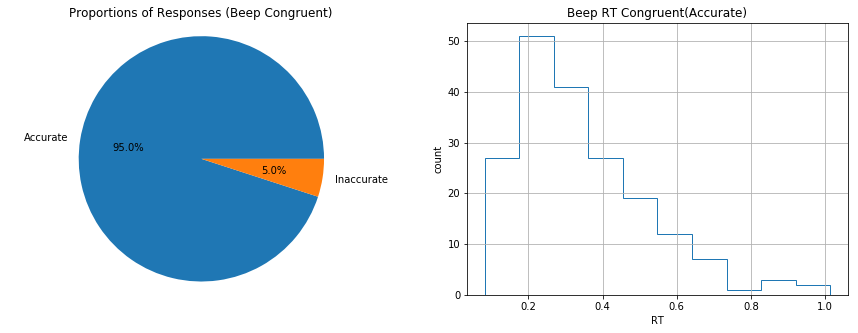

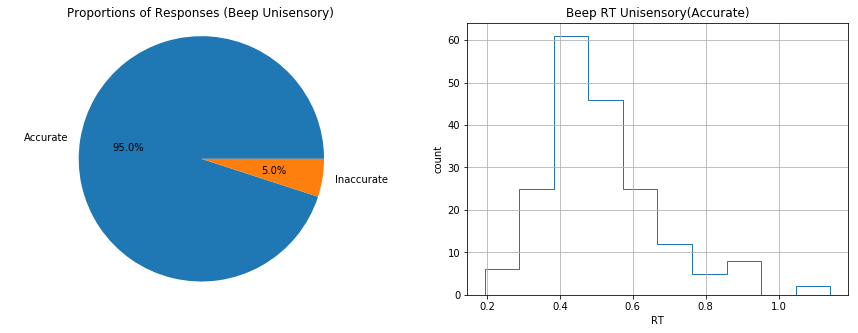

In [27]:
sizes = [congrb['acc'].value_counts()[1], congrb['acc'].value_counts()[0]]
labels = ['Accurate', 'Inaccurate']

fig5 = plt.figure(figsize=(15, 5))
ax = fig5.add_subplot(121, title='Proportions of Responses (Beep Congruent)')
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig5.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT Congruent(Accurate)')
#for i, subj_data in congb.groupby('response'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
congrb.loc[congrb['acc'] == 1].rt.hist(histtype='step', ax = ax)    
    
#print(unibdata['response'].value_counts())
sizes = [unib['acc'].value_counts()[1], unib['acc'].value_counts()[0]]
labels = ['Accurate', 'Inaccurate']

fig7 = plt.figure(figsize=(15, 5))
ax = fig7.add_subplot(121, title='Proportions of Responses (Beep Unisensory)')
ax.pie(sizes, labels = labels, autopct='%1.1f%%')
ax.axis('equal')

ax = fig7.add_subplot(122, xlabel='RT', ylabel='count', title='Beep RT Unisensory(Accurate)')
#for i, subj_data in unib.groupby('response'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
unib.loc[unib['acc'] == 1].rt.hist(histtype='step', ax = ax)

In [28]:
### Calculate standard error for each condition(flash response)
def calcstderr(data, col):
    num = float(0)
    count = 0
    for i, subj_data in data.groupby('Subj_id'):
        num += subj_data[col].std()
        count += 1
    return(num/count)

In [29]:
# if subject id is not given, plot the means including std
def plotbars(flashuni, beepuni, flashcongr, beepcongr, title1, title2, subjid = 0):
    if (subjid != 0):
        flashuni = flashuni.loc[flashuni['Subj_id'] == subjid]
        beepuni = beepuni.loc[beepuni['Subj_id'] == subjid]
        flashcongr = flashcongr.loc[flashcongr['Subj_id'] == subjid]
        beepcongr = beepcongr.loc[beepcongr['Subj_id'] == subjid]
        
    fig = plt.figure(figsize=(15,5)) 
    ## % correct plot
    flashuniacc = flashuni['acc'].mean()
    beepuniacc = beepuni['acc'].mean()
    flashcongracc = flashcongr['acc'].mean()
    beepcongracc = beepcongr['acc'].mean()
    allcongracc = (flashcongracc + beepcongracc) / 2
    
    ax = fig.add_subplot(121, xlabel='condition', ylabel='% accurate', title=title1)
    objects = ('Flash Uni', 'Beep Uni', 'Both Congr', 'Flash Congr', 'Beep Congr')
    y_pos = np.arange(len(objects))
    performance = [flashuniacc, beepuniacc, allcongracc, flashcongracc, beepcongracc]

    if(subjid == 0):
        flashuniaccerr = calcstderr(flashuni, 'acc')
        beepuniaccerr = calcstderr(beepuni, 'acc')
        flashcongraccerr = calcstderr(flashcongr, 'acc')
        beepcongraccerr = calcstderr(beepcongr, 'acc')
        allcongraccerr = (flashcongraccerr + beepcongraccerr) / 2
        plt.bar(y_pos, performance, yerr=[flashuniaccerr, beepuniaccerr, allcongraccerr, flashcongraccerr, beepcongraccerr], 
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], ecolor='black', capsize=10)
    else:
        plt.bar(y_pos, performance, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], ecolor='black', capsize=10)
        
    plt.xticks(y_pos, objects)
    plt.ylim([0,1])
    
    ## mean rt plot, only want accurate trials
    flashunirt = flashuni.loc[flashuni['acc'] == 1]['rt'].mean()
    beepunirt = beepuni.loc[beepuni['acc'] == 1]['rt'].mean()
    flashcongrrt = flashcongr.loc[flashcongr['acc'] == 1]['rt'].mean()
    beepcongrrt = beepcongr.loc[beepcongr['acc'] == 1]['rt'].mean()
    allcongrrt = (flashcongrrt + beepcongrrt) / 2
    
    ax = fig.add_subplot(122, xlabel='condition', ylabel='mean rt', title=title2)
    objects = ('Flash Uni', 'Beep Uni', 'Both Congr', 'Flash Congr', 'Beep Congr')
    y_pos = np.arange(len(objects))
    performance = [flashunirt, beepunirt, allcongrrt, flashcongrrt, beepcongrrt]

    if (subjid == 0):
        flashunirterr = calcstderr(flashuni, 'rt')
        beepunirterr = calcstderr(beepuni, 'rt')
        flashcongrrterr = calcstderr(flashcongr, 'rt')
        beepcongrrterr = calcstderr(beepcongr, 'rt')
        allcongrrterr = (flashcongrrterr + beepcongrrterr) / 2
        plt.bar(y_pos, performance, yerr=[flashunirterr, beepunirterr, allcongrrterr, flashcongrrterr, beepcongrrterr], 
                color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], ecolor='black', capsize=10)
    else:
        plt.bar(y_pos, performance, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'], ecolor='black', capsize=10)
        
    plt.xticks(y_pos, objects)
    plt.ylim([0,1])

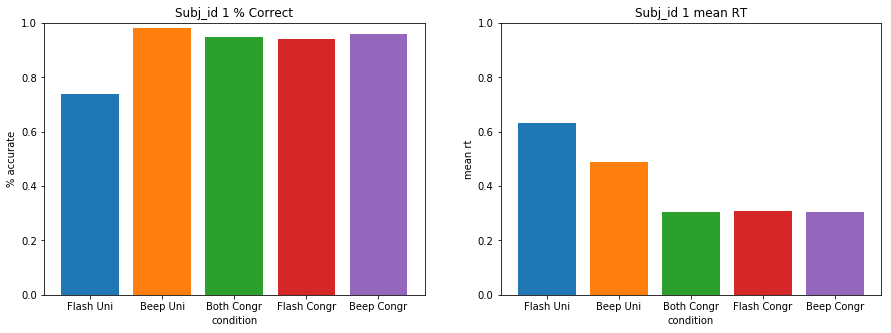

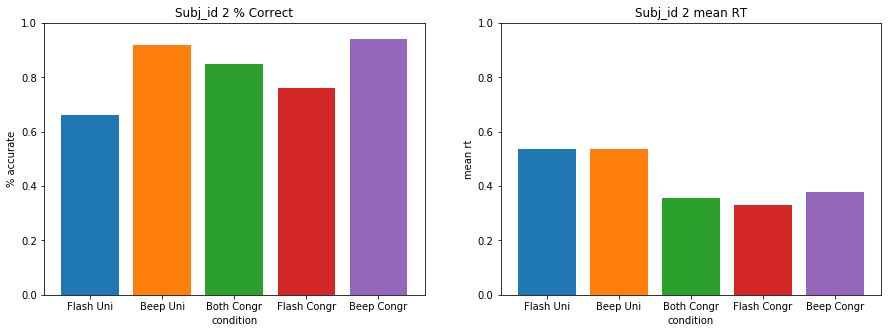

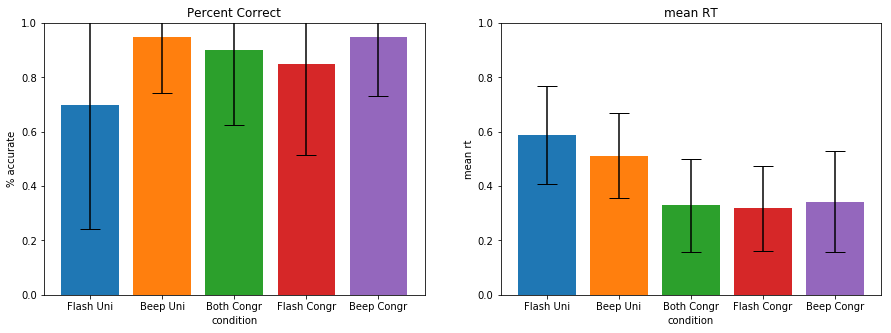

In [30]:
plotbars(unif, unib, congrf, congrb, "Subj_id 1 % Correct", "Subj_id 1 mean RT", 1)
plotbars(unif, unib, congrf, congrb, "Subj_id 2 % Correct", "Subj_id 2 mean RT", 2)
plotbars(unif, unib, congrf, congrb, "Percent Correct", "mean RT")

## Between Subjects Model

In [33]:
import hddm

ImportError: No module named hddm

In [42]:
alldata = pd.concat([flashframe, beepframe])
alldata.columns = ['Subj_id', 'flashpres', 'beeppres', 'response', 'rt']
conditions = [(alldata['flashpres'] == 0) & (alldata['beeppres'] == 2), 
              (alldata['flashpres'] == 0) & (alldata['beeppres'] == 3),
              (alldata['flashpres'] == 2) & (alldata['beeppres'] == 0),
              (alldata['flashpres'] == 3) & (alldata['beeppres'] == 0),
              (alldata['flashpres'] == 2) & (alldata['beeppres'] == 2),
              (alldata['flashpres'] == 3) & (alldata['beeppres'] == 3),]
choices = ['A2', 'A3', 'V2', 'V3', 'A2V2', 'A3V3']
alldata['stimName'] = np.select(conditions, choices)
#alldata

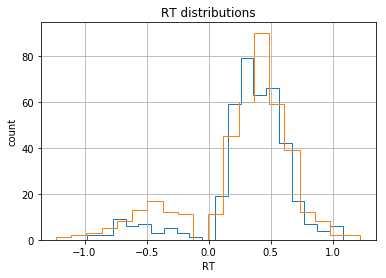

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in flipalldata.groupby('Subj_id'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [16]:
model = hddm.HDDM(alldata)
model.find_starting_values()
model.sample(2000, burn=20)

-263.433834757
-263.433828574
 [-----------------100%-----------------] 2000 of 2000 complete in 22.6 sec

        mean         std     2.5q        25q       50q        75q      97.5q       mc err
a    1.55843   0.0313912  1.49825    1.53635   1.55812    1.58047    1.61833   0.00112577
v    1.33912   0.0593266   1.2239     1.2985   1.33955    1.38068    1.44988   0.00163412
t  0.0227642  0.00289861  0.01684  0.0209694  0.023006  0.0248134  0.0279003  9.49218e-05
DIC: 519.085146
deviance: 516.113748
pD: 2.971398
Plotting a
Plotting v
Plotting t


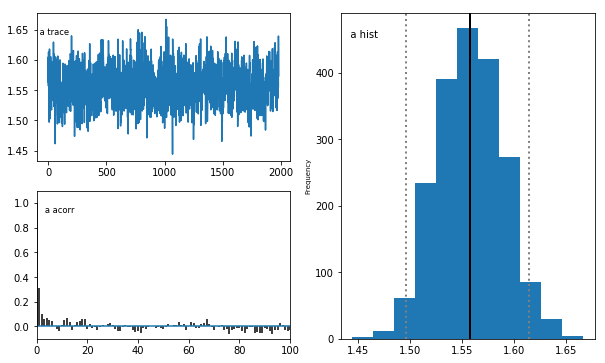

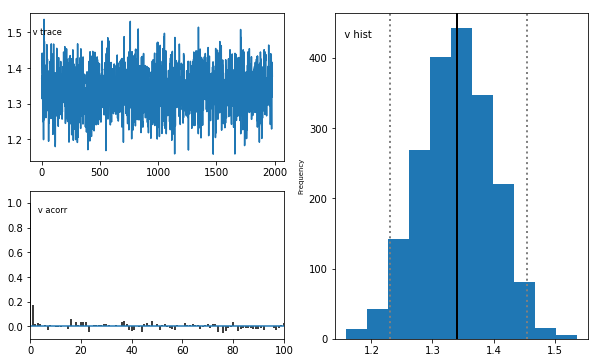

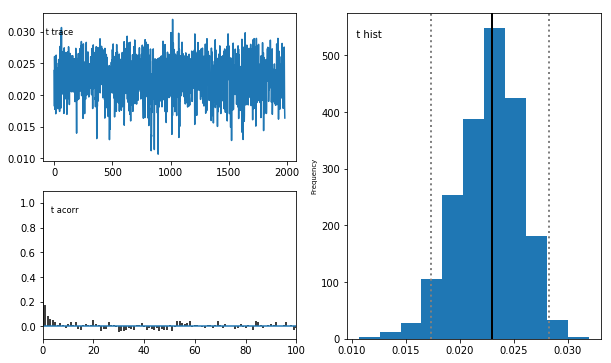

In [17]:
model.print_stats()
model.plot_posteriors(['a', 't', 'v', 'a_std'])

C:\Users\Edwin\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


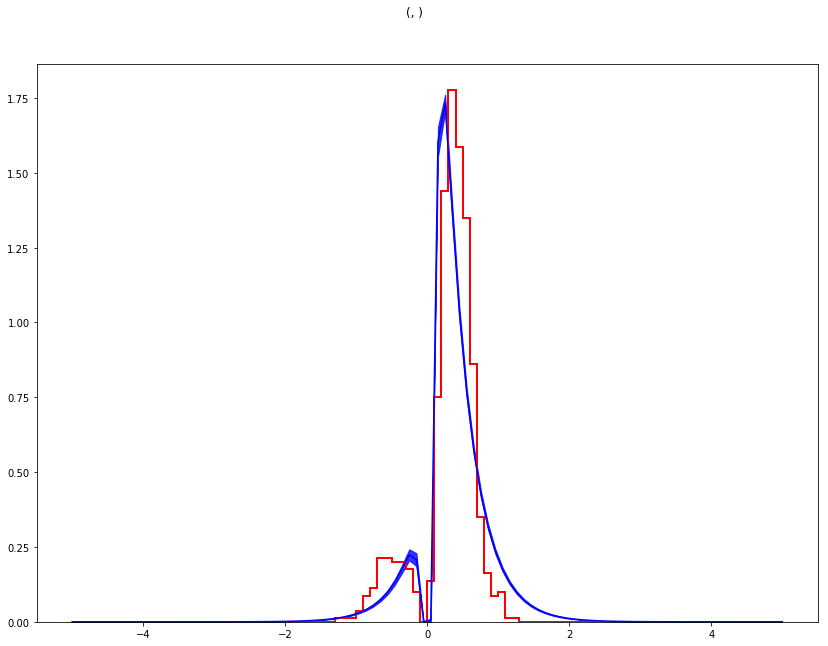

In [18]:
model.plot_posterior_predictive(figsize=(14, 10))

We can model the data using prior information that congruency will usually mean higher drift rate

In [19]:
m_stim = hddm.HDDM(alldata, depends_on={'v': 'stimName'}, include=['a', 'v', 't', 'z', 'p_outlier'])
m_stim.find_starting_values()
m_stim.sample(10000, burn=1000)

-143.101306883
-143.101015973
 [-----------------100%-----------------] 10000 of 10000 complete in 222.5 sec

In [20]:
models = list()
for i in range(5):
    m = hddm.HDDM(alldata)
    m.find_starting_values()
    m.sample(5000, burn=20)
    models.append(m)

-263.434669971
-263.43388021
 [-----------------100%-----------------] 5000 of 5000 complete in 113.8 sec-263.433847332
-263.433827629
 [-----------------100%-----------------] 5000 of 5000 complete in 114.0 sec-263.44002829
-263.435056488
 [-----------------100%-----------------] 5000 of 5000 complete in 115.4 sec-263.44002829
-263.435056488
 [-----------------100%-----------------] 5000 of 5000 complete in 114.5 sec-263.44002829
-263.435056488
 [-----------------100%-----------------] 5000 of 5000 complete in 116.3 sec

In [21]:
hddm.analyze.gelman_rubin(models)

{'a': 1.0000928082113025, 't': 1.0000963888642345, 'v': 1.000082927346593}

In [1]:
v_V2, v_V3, v_A2, v_A3, v_A2V2, v_A3V3 = m_stim.nodes_db.node[['v(V2)', 'v(V3)', 'v(A2)', 'v(A3)', 'v(A2V2)', 'v(A3V3)']]
hddm.analyze.plot_posterior_nodes([v_V2, v_V3, v_A2, v_A3, v_A2V2, v_A3V3])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Posterior of drift-rate group means')
m_stim.print_stats()

NameError: name 'm_stim' is not defined

In [71]:
def formatmodeldata(df, conditions, choices):
    dframe = df.copy()
    dframe.columns = ['Subj_id', 'flashpres', 'beeppres', 'response', 'rt']
    dframe['stimName'] = np.select(conditions, choices)
    return(dframe)
    

model_unif = formatmodeldata(unif, [(unif['flashpres'] == 2), (unif['flashpres'] == 3)], ['F2', 'F3'])
model_unib = formatmodeldata(unib, [(unib['beeppres'] == 2), (unib['beeppres'] == 3)], ['B2', 'B3'])
model_congrf = formatmodeldata(congrf, [(congrf['flashpres'] == 2) & (congrf['beeppres'] == 2),
                                        (congrf['flashpres'] == 3) & (congrf['beeppres'] == 3)], ['F2B2', 'F3B3'])
model_congrb = formatmodeldata(congrb, [(congrb['flashpres'] == 2) & (congrb['beeppres'] == 2),
                                        (congrb['flashpres'] == 3) & (congrb['beeppres'] == 3)], ['F2B2', 'F3B3'])

In [ ]:
unif_stim = hddm.HDDM(alldata, depends_on={'v': 'stimName'}, include=['a', 'v', 't', 'z', 'p_outlier'])
unif_stim.find_starting_values()
unif_stim.sample(10000, burn=1000)

In [ ]:
congrf_stim = hddm.HDDM(alldata, depends_on={'v': 'stimName'}, include=['a', 'v', 't', 'z', 'p_outlier'])
congrf_stim.find_starting_values()
congrf_stim.sample(10000, burn=1000)

In [ ]:
unib_stim = hddm.HDDM(alldata, depends_on={'v': 'stimName'}, include=['a', 'v', 't', 'z', 'p_outlier'])
unib_stim.find_starting_values()
unib_stim.sample(10000, burn=1000)

In [ ]:
congrb_stim = hddm.HDDM(alldata, depends_on={'v': 'stimName'}, include=['a', 'v', 't', 'z', 'p_outlier'])
congrb_stim.find_starting_values()
congrb_stim.sample(10000, burn=1000)